## Getting started: Introduction to Keras

The core data structure of Keras is a __model__, a way to organize layers. The simplest type of model is the [`Sequential`](https://keras.io/getting-started/sequential-model-guide) model, a linear stack of layers. For more complex architectures, you should use the [Keras functional API](https://keras.io/getting-started/functional-api-guide), which allows to build arbitrary graphs of layers.

Here is the `Sequential` model:

```python
from keras.models import Sequential

model = Sequential()
```

Stacking layers is as easy as `.add()`:

```python
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
```

Once your model looks good, configure its learning process with `.compile()`:

```python
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
```

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code).
```python
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```python
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)
```

Evaluate your performance in one line:

```python
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
```

Or generate predictions on new data:

```python
classes = model.predict(x_test, batch_size=128)
```

Building a question answering system, an image classification model, a Neural Turing Machine, or any other model is just as fast. The ideas behind deep learning are simple, so why should their implementation be painful?


## Import Necessary Library

In [46]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import tensorflow.keras.backend as K
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

print(tf.__version__)


1.11.0


In [0]:
np.random.seed(2017)
tf.set_random_seed(2017)

## Download Dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Data Exploration

In [27]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

![alt text](https://storage.googleapis.com/allianz-course/data/fashion_mnist_label.jpg =200x400)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

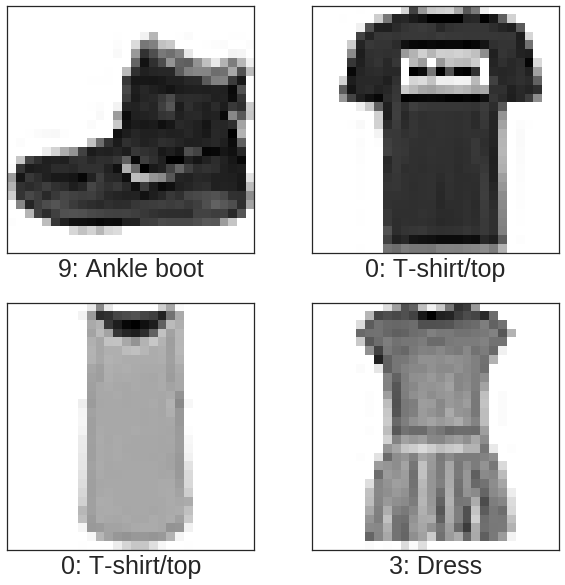

In [29]:
# preview some images in each class

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i])+': '+class_names[train_labels[i]], size=25)


In [30]:
print("Train image shape:{0}".format(train_images.shape))
print("Test image shape:{0}".format(test_images.shape))
print("Train class: {0}".format(np.unique(train_labels)))
print("Test class: {0}".format(np.unique(test_labels)))

Train image shape:(60000, 28, 28)
Test image shape:(10000, 28, 28)
Train class: [0 1 2 3 4 5 6 7 8 9]
Test class: [0 1 2 3 4 5 6 7 8 9]


## Data Preprocessing




### Normalizing(feature_scaling)


In machine learning, we want the model to be able to learn the real structures instead of dealing with the scales difference. Therefore, we would normalize data before feeding it into model.

![Normalizing(feature_scaling)](https://storage.googleapis.com/allianz-course/data/feature_scaling.jpg =300x150)

Max value in this image: 255
Min value in this image: 0


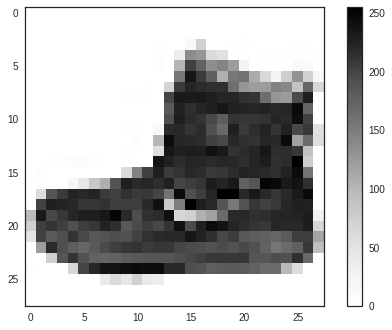

In [31]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
print('Max value in this image: {}'.format(np.amax(train_images[0])))
print('Min value in this image: {}'.format(np.amin(train_images[0])))

In [0]:
# Normalize Data
train_images = train_images / 255.0
test_images = test_images / 255.0

### **One-hot encoding**

The label now is 0, 1, 2, 3, ...., 9 and they are 'symbols' of classes. However, if we use 0,1,2,3,...,9 to indicate classes, there would be ordinal relationship between the classes.  Therefore, one-hot encoding method is applied to label before training.

![alt text](https://storage.googleapis.com/allianz-course/data/one-hot.jpg =600x400)

In [0]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

## Train Model

### **(Lab 2-a) Basic Model: model_sig_sgd_001**
* Hidden Layer: [ 128 , 64 ]
* Activation funcition in Hidden Layers: Sigmoid
* Optimizer: SGD
* Learning Rate: 0.001
* Training Epoch: 20


***Hint***: 

To add dense layer in keras, use: 
``` python
# n is number of neurons
# act is activation function, such as 'sigmoid', 'relu', 'softmax'
model.add(Dense(n, activation = act))
```

In [36]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_sig_sgd_001 = Sequential()
model_sig_sgd_001.add(Flatten(input_shape=(28, 28)))
model_sig_sgd_001.add(Dense(128, activation = 'sigmoid'))

############# START CODING HERE #############

# add one dense layer with 64 neurons and with 'sigmoid' activation function (~ 1 line)
model_sig_sgd_001.add(Dense(64, activation = 'sigmoid'))

############# END CODING HERE ###############

model_sig_sgd_001.add(Dense(10, activation='softmax'))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
model_sig_sgd_001.compile(loss='categorical_crossentropy',
                          optimizer = opt,
                          metrics = ['accuracy'])

# Use .summary() to see model details
model_sig_sgd_001.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [37]:
train_sig_sgd_001 = model_sig_sgd_001.fit(train_images, train_labels, epochs = 20, validation_split = 0.05, shuffle=False)


Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 7s 124us/step - loss: 2.3502 - acc: 0.1703 - val_loss: 2.2605 - val_acc: 0.3200
Epoch 2/20
57000/57000 [==============================] - 7s 122us/step - loss: 2.2408 - acc: 0.4030 - val_loss: 2.2211 - val_acc: 0.4730
Epoch 3/20
57000/57000 [==============================] - 7s 123us/step - loss: 2.2002 - acc: 0.4673 - val_loss: 2.1771 - val_acc: 0.5043
Epoch 4/20
57000/57000 [==============================] - 7s 122us/step - loss: 2.1522 - acc: 0.4889 - val_loss: 2.1242 - val_acc: 0.5120
Epoch 5/20
57000/57000 [==============================] - 7s 124us/step - loss: 2.0941 - acc: 0.4972 - val_loss: 2.0602 - val_acc: 0.5140
Epoch 6/20
57000/57000 [==============================] - 7s 123us/step - loss: 2.0246 - acc: 0.5021 - val_loss: 1.9848 - val_acc: 0.5190
Epoch 7/20
57000/57000 [==============================] - 7s 123us/step - loss: 1.9453 - acc: 0.5086 - val_loss: 1.9014 - v

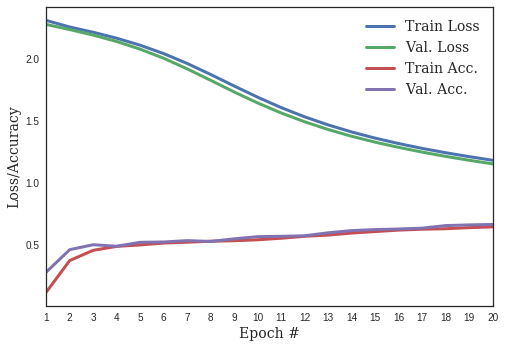

In [14]:
# Plot the training result

plt.figure()
epoch = len(train_sig_sgd_001.history["loss"])
plt.plot(np.arange(1, epoch+1), train_sig_sgd_001.history["loss"], label="Train Loss", lw=3)
plt.plot(np.arange(1, epoch+1), train_sig_sgd_001.history["val_loss"], label="Val. Loss", lw=3)
plt.plot(np.arange(1, epoch+1), train_sig_sgd_001.history["acc"], label="Train Acc.", lw=3)
plt.plot(np.arange(1, epoch+1), train_sig_sgd_001.history["val_acc"], label="Val. Acc.", lw=3)
plt.xlabel("Epoch #", family='serif', size=14)
plt.ylabel("Loss/Accuracy", family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

### **(Lab 2-b) Change activation function to Relu: model_relu_sgd_001**

Now, change the activation function in hidden layers to RELU with the following details:

* Hidden Layer: [ 128 , 64 ]
* Activation funcition in Hidden Layers: **Relu**
* Optimizer: SGD
* Learning Rate: 0.001
* Training Epoch: 20

***Hint***: 

To add dense layer in keras, use: 
```python
# n is number of neurons
# act is activation function, such as 'sigmoid', 'relu', 'softmax'
model.add(Dense(n, activation = act))
```

In [15]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_relu_sgd_001 = Sequential()
model_relu_sgd_001.add(Flatten(input_shape=(28, 28)))
model_relu_sgd_001.add(Dense(128, activation = 'relu'))

############# START CODING HERE #############

# add one dense layer with 64 neurons and with 'relu' activation function (~ 1 line)
model_relu_sgd_001.add(Dense(64, activation = 'relu'))

############# END CODING HERE ###############

model_relu_sgd_001.add(Dense(10, activation='softmax'))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
model_relu_sgd_001.compile(loss='categorical_crossentropy',
                          optimizer = opt,
                          metrics = ['accuracy'])

# Use .summary() to see model details
model_relu_sgd_001.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_relu_sgd_001 = model_relu_sgd_001.fit(train_images, train_labels, epochs = 20, validation_split = 0.05)


Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 7s 121us/step - loss: 1.5180 - acc: 0.5207 - val_loss: 1.0272 - val_acc: 0.6813
Epoch 2/20
57000/57000 [==============================] - 7s 120us/step - loss: 0.8919 - acc: 0.7064 - val_loss: 0.7865 - val_acc: 0.7257
Epoch 3/20
57000/57000 [==============================] - 7s 119us/step - loss: 0.7450 - acc: 0.7498 - val_loss: 0.6861 - val_acc: 0.7633
Epoch 4/20
57000/57000 [==============================] - 7s 120us/step - loss: 0.6734 - acc: 0.7756 - val_loss: 0.6314 - val_acc: 0.7850
Epoch 5/20
57000/57000 [==============================] - 7s 120us/step - loss: 0.6265 - acc: 0.7923 - val_loss: 0.5917 - val_acc: 0.7963
Epoch 6/20
57000/57000 [==============================] - 7s 120us/step - loss: 0.5926 - acc: 0.8025 - val_loss: 0.5618 - val_acc: 0.8120
Epoch 7/20
57000/57000 [==============================] - 7s 120us/step - loss: 0.5673 - acc: 0.8115 - val_loss: 0.5392 - v

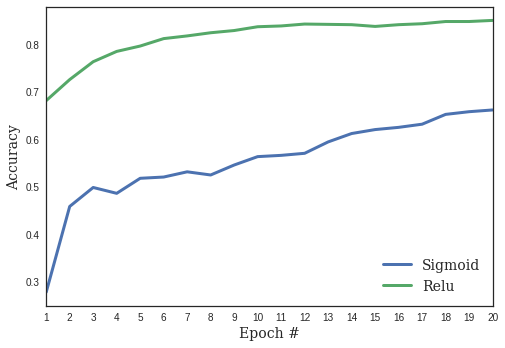

In [17]:
plt.figure()
epoch = len(train_relu_sgd_001.history["loss"])
plt.plot(np.arange(1, epoch+1), train_sig_sgd_001.history['val_acc'], label='Sigmoid', lw=3)
plt.plot(np.arange(1, epoch+1), train_relu_sgd_001.history['val_acc'], label='Relu', lw=3)
plt.ylabel('Accuracy', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

### (Lab 2-c) Change optimizer to Adam: model_relu_adam_001

Now, change the optimizer to Adam with the following details:

* Hidden Layer: [ 128 , 64 ]
* Activation funcition in Hidden Layers: Relu
* Optimizer: **Adam**
* Learning Rate: 0.001
* Training Epoch: 20

***Hint***: 

To use adam optimizer:
```python
# learning rate is lr
opt = tf.train.AdamOptimizer(learning_rate = lr)
```

In [65]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_relu_adam_001 = Sequential()
model_relu_adam_001.add(Flatten(input_shape=(28, 28)))
model_relu_adam_001.add(Dense(128, activation = 'relu'))
model_relu_adam_001.add(Dense(64, activation = 'relu'))
model_relu_adam_001.add(Dense(10, activation='softmax'))

############# START CODING HERE #############

# create a adam optimizer with learning rate 0.001 (~ 1 line)(hint: tf.train.AdamOptimizer(learning_rate = n))
# opt = 

############# END CODING HERE ###############
opt = tf.train.AdamOptimizer(learning_rate = 0.001)

model_relu_adam_001.compile(loss='categorical_crossentropy',
                           optimizer = opt,
                           metrics = ['accuracy'])

# Use .summary() to see model details
model_relu_adam_001.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [66]:
train_relu_adam_001 = model_relu_adam_001.fit(train_images, train_labels, epochs = 20, validation_split = 0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 8s 141us/step - loss: 0.4970 - acc: 0.8229 - val_loss: 0.3873 - val_acc: 0.8557
Epoch 2/20
57000/57000 [==============================] - 8s 137us/step - loss: 0.3696 - acc: 0.8650 - val_loss: 0.3402 - val_acc: 0.8670
Epoch 3/20
57000/57000 [==============================] - 8s 137us/step - loss: 0.3328 - acc: 0.8771 - val_loss: 0.3310 - val_acc: 0.8800
Epoch 4/20
57000/57000 [==============================] - 8s 136us/step - loss: 0.3083 - acc: 0.8866 - val_loss: 0.3468 - val_acc: 0.8713
Epoch 5/20
57000/57000 [==============================] - 8s 139us/step - loss: 0.2935 - acc: 0.8917 - val_loss: 0.3205 - val_acc: 0.8780
Epoch 6/20
57000/57000 [==============================] - 8s 138us/step - loss: 0.2806 - acc: 0.8954 - val_loss: 0.3203 - val_acc: 0.8820
Epoch 7/20
57000/57000 [==============================] - 8s 139us/step - loss: 0.2686 - acc: 0.8999 - val_loss: 0.3145 - v

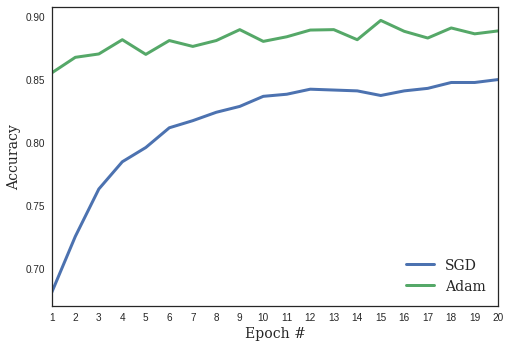

In [20]:
plt.figure()
epoch = len(train_relu_adam_001.history["loss"])
plt.plot(np.arange(1, epoch+1), train_relu_sgd_001.history['val_acc'], label = 'SGD', lw=3)
plt.plot(np.arange(1, epoch+1), train_relu_adam_001.history['val_acc'], label = 'Adam', lw=3)
plt.ylabel('Accuracy', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

###(Lab 2-d) Change Learning Rate to 0.01: model_relu_adam_01

Now, change the learning rate to 0.01 with the following details:

* Hidden Layer: [ 128 , 64 ]
* Activation funcition in Hidden Layers: **Relu**
* Optimizer: Adam
* Learning Rate: 0.01
* Training Epoch: 20

***Hint***: 

To use adam optimizer with learning rate lr:
```python
# learning rate is lr
opt = tf.train.AdamOptimizer(learning_rate = lr)
```

In [23]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_relu_adam_01 = Sequential()
model_relu_adam_01.add(Flatten(input_shape=(28, 28)))
model_relu_adam_01.add(Dense(128, activation = 'relu'))
model_relu_adam_01.add(Dense(64, activation = 'relu'))
model_relu_adam_01.add(Dense(10, activation='softmax'))

############# START CODING HERE #############

# create a adam optimizer with learning rate 0.01 (~ 1 line)(hint: tf.train.AdamOptimizer(learning_rate = n))
# opt = 

############# END CODING HERE ###############
opt = tf.train.AdamOptimizer(learning_rate = 0.01)

model_relu_adam_01.compile(loss='categorical_crossentropy',
                           optimizer = opt,
                           metrics = ['accuracy'])

# Use .summary() to see model details
model_relu_adam_01.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [24]:
train_relu_adam_01 = model_relu_adam_01.fit(train_images, train_labels, epochs = 20, validation_split = 0.05)


Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 8s 137us/step - loss: 0.5446 - acc: 0.8050 - val_loss: 0.4763 - val_acc: 0.8373
Epoch 2/20
57000/57000 [==============================] - 8s 135us/step - loss: 0.4388 - acc: 0.8433 - val_loss: 0.5272 - val_acc: 0.8253
Epoch 3/20
57000/57000 [==============================] - 8s 132us/step - loss: 0.4174 - acc: 0.8538 - val_loss: 0.4319 - val_acc: 0.8480
Epoch 4/20
57000/57000 [==============================] - 8s 133us/step - loss: 0.4076 - acc: 0.8555 - val_loss: 0.4487 - val_acc: 0.8490
Epoch 5/20
57000/57000 [==============================] - 8s 133us/step - loss: 0.3976 - acc: 0.8605 - val_loss: 0.4073 - val_acc: 0.8633
Epoch 6/20
57000/57000 [==============================] - 8s 133us/step - loss: 0.3842 - acc: 0.8628 - val_loss: 0.4103 - val_acc: 0.8567
Epoch 7/20
57000/57000 [==============================] - 8s 133us/step - loss: 0.3814 - acc: 0.8662 - val_loss: 0.4117 - v

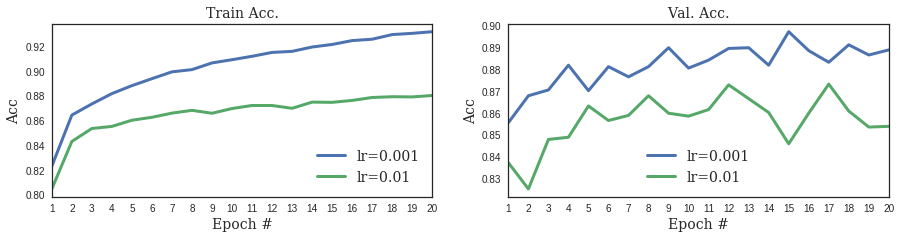

In [25]:
epoch = 20

plt.figure(figsize=(15,7))

plt.subplot(221)
plt.plot(np.arange(1, epoch+1), train_relu_adam_001.history['acc'], label='lr='+str(0.001), lw=3)
plt.plot(np.arange(1, epoch+1), train_relu_adam_01.history['acc'], label='lr='+str(0.01), lw=3)

plt.ylabel('Acc', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.title('Train Acc.',size=14, family= 'serif')


plt.subplot(222)
plt.plot(np.arange(1, epoch+1), train_relu_adam_001.history['val_acc'], label='lr='+str(0.001), lw=3)
plt.plot(np.arange(1, epoch+1), train_relu_adam_01.history['val_acc'], label='lr='+str(0.01), lw=3)

plt.ylabel('Acc', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.title('Val. Acc.',size=14, family= 'serif')
plt.show()



### (Lab 2-e) Add more neurons in hidden layers(overfit) : model_large_relu_adam_001

Now, change hidden layer neurons to [2048, 1024] with the following details:

* Hidden Layer: [ 2048 , 1024 ]
* Activation funcition in Hidden Layers: **Relu**
* Optimizer: Adam
* Learning Rate: 0.001
* Training Epoch: 20

***Hint***: 

To use adam optimizer with learning rate lr:
```python
# learning rate is lr
opt = tf.train.AdamOptimizer(learning_rate = lr)
```


In [13]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_large_relu_adam_001 = Sequential()
model_large_relu_adam_001.add(Flatten(input_shape=(28, 28)))

############# START CODING HERE #############

# Create hidden layer with 2048 neurons and relu activation function (~ 1 line)

# Create hidden layer with 1024 neurons and relu activation function (~ 1 line)

# Create an output layer with 10 neurons and softmax activation function (~ 1 line)

# Create a Adam optimizer with learning rate = 0.001 ( ~ 1 line)(hint: tf.train.AdamOptimizer(learning_rate = n))
# opt = 

############# END CODING HERE ###############

model_large_relu_adam_001.add(Dense(2048, activation = 'relu'))
model_large_relu_adam_001.add(Dense(1024, activation = 'relu'))
model_large_relu_adam_001.add(Dense(10, activation='softmax'))
opt = tf.train.AdamOptimizer(learning_rate = 0.001)


model_large_relu_adam_001.compile(loss='categorical_crossentropy',
                           optimizer = opt,
                           metrics = ['accuracy'])

# Use .summary() to see model details
model_large_relu_adam_001.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_large_relu_adam_001 = model_large_relu_adam_001.fit(train_images, train_labels, epochs = 20, validation_split = 0.05)


Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 12s 213us/step - loss: 0.4759 - acc: 0.8249 - val_loss: 0.3764 - val_acc: 0.8613
Epoch 2/20
57000/57000 [==============================] - 11s 196us/step - loss: 0.3593 - acc: 0.8671 - val_loss: 0.4008 - val_acc: 0.8540
Epoch 3/20
57000/57000 [==============================] - 11s 196us/step - loss: 0.3209 - acc: 0.8822 - val_loss: 0.3465 - val_acc: 0.8750
Epoch 4/20
57000/57000 [==============================] - 11s 196us/step - loss: 0.2991 - acc: 0.8889 - val_loss: 0.3251 - val_acc: 0.8850
Epoch 5/20
57000/57000 [==============================] - 11s 194us/step - loss: 0.2799 - acc: 0.8961 - val_loss: 0.3051 - val_acc: 0.8890
Epoch 6/20
57000/57000 [==============================] - 11s 197us/step - loss: 0.2652 - acc: 0.8992 - val_loss: 0.3373 - val_acc: 0.8843
Epoch 7/20
57000/57000 [==============================] - 11s 197us/step - loss: 0.2493 - acc: 0.9057 - val_loss: 0.2

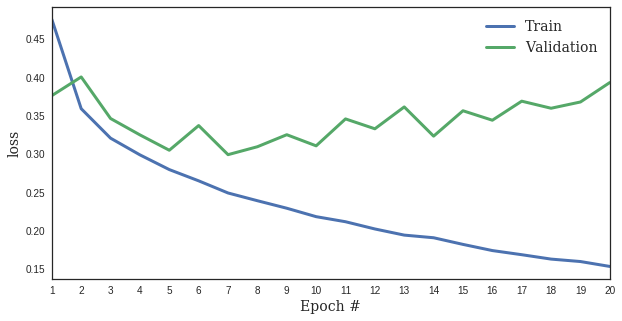

In [15]:
plt.figure(figsize=(10,5))
epoch = len(train_large_relu_adam_001.history["loss"])
plt.plot(np.arange(1, epoch+1), train_large_relu_adam_001.history['loss'], label='Train', lw=3)
plt.plot(np.arange(1, epoch+1), train_large_relu_adam_001.history['val_loss'], label='Validation', lw=3)
plt.ylabel('loss', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

## **Overfit Solution**



### (Lab 2-f) Early Stopping

Stop training when a monitored quantity has stopped improving.

```python

keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, mode='auto')

```
monitor: quantity to be monitored.

patience: number of epochs with no improvement after which training will be stopped.

mode: one of {auto, min, max}.    
<br/>


In [42]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_large_relu_adam_001_es = Sequential()
model_large_relu_adam_001_es.add(Flatten(input_shape=(28, 28)))
model_large_relu_adam_001_es.add(Dense(2048, activation = 'relu'))
model_large_relu_adam_001_es.add(Dense(1024, activation = 'relu'))
model_large_relu_adam_001_es.add(Dense(10, activation='softmax'))

opt = tf.train.AdamOptimizer(learning_rate = 0.001)

model_large_relu_adam_001_es.compile(loss='categorical_crossentropy',
                           optimizer = opt,
                           metrics = ['accuracy'])

# Use .summary() to see model details
model_large_relu_adam_001_es.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Create a early stopping callback
EarlyStopping = keras.callbacks.EarlyStopping(
                         monitor='val_loss',
                         patience=3,
                         mode='auto')

callbacks_list = [EarlyStopping] 

train_model_large_relu_adam_001_es = model_large_relu_adam_001_es.fit(train_images,
                                                                      train_labels, 
                                                                      epochs=20, 
                                                                      validation_split = 0.05,
                                                                      callbacks=callbacks_list)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 12s 207us/step - loss: 0.4802 - acc: 0.8247 - val_loss: 0.3994 - val_acc: 0.8533
Epoch 2/20
57000/57000 [==============================] - 12s 207us/step - loss: 0.3596 - acc: 0.8680 - val_loss: 0.3419 - val_acc: 0.8693
Epoch 3/20
57000/57000 [==============================] - 12s 205us/step - loss: 0.3242 - acc: 0.8799 - val_loss: 0.3269 - val_acc: 0.8767
Epoch 4/20
57000/57000 [==============================] - 11s 201us/step - loss: 0.2986 - acc: 0.8883 - val_loss: 0.3368 - val_acc: 0.8770
Epoch 5/20
57000/57000 [==============================] - 11s 200us/step - loss: 0.2792 - acc: 0.8950 - val_loss: 0.3375 - val_acc: 0.8800
Epoch 6/20
57000/57000 [==============================] - 11s 200us/step - loss: 0.2647 - acc: 0.9003 - val_loss: 0.3382 - val_acc: 0.8797


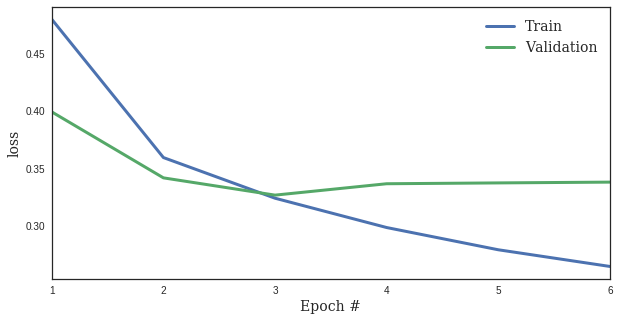

In [44]:
plt.figure(figsize=(10,5))
epoch = len(train_model_large_relu_adam_001_es.history["loss"])
plt.plot(np.arange(1, epoch+1), train_model_large_relu_adam_001_es.history['loss'], label='Train', lw=3)
plt.plot(np.arange(1, epoch+1), train_model_large_relu_adam_001_es.history['val_loss'], label='Validation', lw=3)
plt.ylabel('loss', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

###  Save Best Model


The latest best model according to the quantity monitored will not be overwritten.
```python
keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto', period=1)
```

### (Lab 2-g) Dropout



![alt text](https://storage.googleapis.com/allianz-course/data/dropout.jpg =400x200)

<br/>
Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
```python
keras.layers.Dropout(rate)
```
rate: float between 0 and 1. Fraction of the input units to drop.

**Sample Code:**
```python
  model = Sequential()
  model.add(Dense(60, input_dim=60, activation='relu')
  model.add(Dropout(0.2))
  model.add(Dense(30, activation='relu')
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

```

 

In [47]:
# Clean session fisrt
K.clear_session()

# Start building the model 
model_large_relu_adam_001_do = Sequential()
model_large_relu_adam_001_do.add(Flatten(input_shape=(28, 28)))
model_large_relu_adam_001_do.add(Dense(2048, activation = 'relu'))
model_large_relu_adam_001_do.add(Dropout(0.5))
model_large_relu_adam_001_do.add(Dense(1024, activation = 'relu'))
model_large_relu_adam_001_do.add(Dropout(0.5))
model_large_relu_adam_001_do.add(Dense(10, activation='softmax'))

opt = tf.train.AdamOptimizer(learning_rate = 0.001)

model_large_relu_adam_001_do.compile(loss='categorical_crossentropy',
                           optimizer = opt,
                           metrics = ['accuracy'])

# Use .summary() to see model details
model_large_relu_adam_001_do.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________


In [48]:
train_model_large_relu_adam_001_do = model_large_relu_adam_001_do.fit(train_images,
                                                                      train_labels, 
                                                                      epochs=20, 
                                                                      validation_split = 0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 13s 221us/step - loss: 0.6015 - acc: 0.7828 - val_loss: 0.4305 - val_acc: 0.8400
Epoch 2/20
57000/57000 [==============================] - 13s 220us/step - loss: 0.4810 - acc: 0.8261 - val_loss: 0.3831 - val_acc: 0.8643
Epoch 3/20
57000/57000 [==============================] - 12s 217us/step - loss: 0.4570 - acc: 0.8355 - val_loss: 0.3813 - val_acc: 0.8620
Epoch 4/20
57000/57000 [==============================] - 12s 215us/step - loss: 0.4376 - acc: 0.8431 - val_loss: 0.3690 - val_acc: 0.8680
Epoch 5/20
57000/57000 [==============================] - 12s 214us/step - loss: 0.4265 - acc: 0.8454 - val_loss: 0.3862 - val_acc: 0.8637
Epoch 6/20
57000/57000 [==============================] - 12s 212us/step - loss: 0.4229 - acc: 0.8464 - val_loss: 0.3651 - val_acc: 0.8700
Epoch 7/20
57000/57000 [==============================] - 12s 212us/step - loss: 0.4092 - acc: 0.8543 - val_loss: 0.3

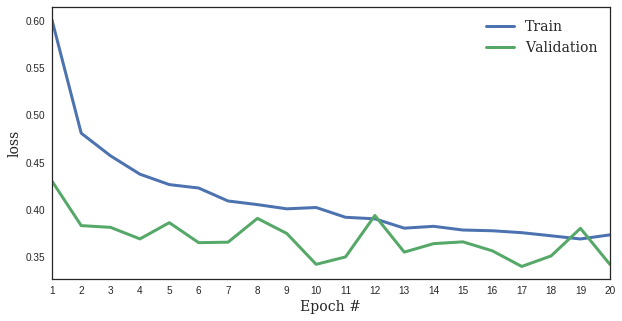

In [49]:
plt.figure(figsize=(10,5))
epoch = len(train_model_large_relu_adam_001_do.history["loss"])
plt.plot(np.arange(1, epoch+1), train_model_large_relu_adam_001_do.history['loss'], label='Train', lw=3)
plt.plot(np.arange(1, epoch+1), train_model_large_relu_adam_001_do.history['val_loss'], label='Validation', lw=3)
plt.ylabel('loss', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

# Convolutional Neural Network

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Activation

### (lab 2-h) Create a basic CNN model

In [54]:
K.clear_session()

model_basic_cnn = keras.Sequential()

model_basic_cnn.add(Conv2D(filters=32,
                        kernel_size=(3,3),
                        input_shape=(28,28,1),
                        padding='same',
                        activation='relu'))

model_basic_cnn.add(MaxPool2D(pool_size=(2,2),
                       strides=(2,2)))

model_basic_cnn.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    padding='same',
                    activation='relu'))

model_basic_cnn.add(MaxPool2D(pool_size=(2,2),
                       strides=(2,2)))

model_basic_cnn.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    padding='same',
                    activation='relu'))

model_basic_cnn.add(MaxPool2D(pool_size=(2,2),
                           strides=(2,2)))

model_basic_cnn.add(Flatten())

model_basic_cnn.add(Dense(10, activation='softmax'))

model_basic_cnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
__________

In [55]:
opfunc = tf.train.AdamOptimizer(learning_rate = 0.001) 

model_basic_cnn.compile(optimizer = opfunc, 
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])

train_basic_cnn = model_basic_cnn.fit(np.expand_dims(train_images, -1), 
                                      train_labels, 
                                      batch_size=256,
                                      epochs=20, 
                                      validation_split = 0.05,
                                      verbose=1)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 5s 80us/step - loss: 0.6675 - acc: 0.7602 - val_loss: 0.4341 - val_acc: 0.8400
Epoch 2/20
57000/57000 [==============================] - 4s 72us/step - loss: 0.3889 - acc: 0.8605 - val_loss: 0.3517 - val_acc: 0.8713
Epoch 3/20
57000/57000 [==============================] - 4s 72us/step - loss: 0.3346 - acc: 0.8801 - val_loss: 0.3193 - val_acc: 0.8883
Epoch 4/20
57000/57000 [==============================] - 4s 72us/step - loss: 0.2990 - acc: 0.8936 - val_loss: 0.3077 - val_acc: 0.8870
Epoch 5/20
57000/57000 [==============================] - 4s 72us/step - loss: 0.2822 - acc: 0.8975 - val_loss: 0.2885 - val_acc: 0.8950
Epoch 6/20
57000/57000 [==============================] - 4s 72us/step - loss: 0.2620 - acc: 0.9047 - val_loss: 0.2617 - val_acc: 0.9027
Epoch 7/20
57000/57000 [==============================] - 4s 72us/step - loss: 0.2450 - acc: 0.9130 - val_loss: 0.2725 - val_acc:

In [57]:
test_model_basic_cnn = model_basic_cnn.evaluate(np.expand_dims(test_images, -1) , test_labels)
print(f'Testing Accuracy of the Basic CNN: {test_model_basic_cnn[1]}')



10000/10000 [==============================] - 1s 98us/step
Testing Accuracy of the Basic CNN: 0.9174


In [0]:
# class ModelCNN(object):
  
#   def __init__(self, epoch, lr=0.001):
    
#     self.epoch = epoch
#     self.lr = lr
#     self.model = keras.Sequential()
    
#   def build(self):
    
#     K.clear_session()
#     L = keras.layers
    
#     #self.model.add(L.Input(shape=(28, 28, 1)))
    
#     self.model.add(L.Conv2D(filters=32,
#                             kernel_size=(3,3),
#                             input_shape=(28,28,1),
#                             padding='valid',
#                             activation='relu'))
#     self.model.add(L.BatchNormalization())
    
#     self.model.add(L.Conv2D(filters=64,
#                         kernel_size=(3,3),
#                         padding='valid',
#                         activation='relu'))
#     self.model.add(L.BatchNormalization())
    
#     self.model.add(L.Conv2D(filters=128,
#                         kernel_size=(3,3),
#                         padding='same',
#                         activation='relu'))
#     self.model.add(L.BatchNormalization())    
#     self.model.add(L.MaxPool2D(pool_size=(2,2),
#                                strides=(2,2)))
    
#     self.model.add(L.Conv2D(filters=256,
#                         kernel_size=(3,3),
#                         padding='valid',
#                         activation='relu'))
#     self.model.add(L.BatchNormalization())   
    
#     self.model.add(L.Conv2D(filters=512,
#                         kernel_size=(3,3),
#                         padding='valid',
#                         activation='relu'))
#     self.model.add(L.BatchNormalization())   
#     self.model.add(L.MaxPool2D(pool_size=(8,8),
#                                strides=(1,1)))  
#     #self.model.add(L.GlobalAveragePooling2D())
#     self.model.add(L.Flatten()) 
#     self.model.add(L.Dense(10, activation='softmax'))
     
#     self.model.summary()
      
     
#     opfunc = tf.train.AdamOptimizer(learning_rate = self.lr)               
#     self.model.compile(optimizer = opfunc, 
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])
    
#     #return self.model
 
    
#   def train(self, images, labels, plot_flag = False):
#     images = np.expand_dims(images, -1)
#     #images = np.pad(images, ((0,0),(2,2),(2,2),(0,0)), 'constant') # pad to 32*32*1
#     train_his = self.model.fit(images, labels, 
#                                batch_size=128,
#                                epochs=self.epoch, 
#                                validation_split = 0.05,
#                                verbose=1)
#     return train_his
  
#   def evaluate(self, images, labels):
#     images = np.expand_dims(images, -1)
#     result = self.model.evaluate(images , labels, batch_size=128, verbose=1)
#     return result

## (lab 2-e) Create a advanced CNN model

In [71]:
K.clear_session()

model_cnn = keras.Sequential()

model_cnn.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     input_shape=(28,28,1),
                     padding='valid',
                     use_bias=False,
                     activation=None))

model_cnn.add(BatchNormalization())

model_cnn.add(Activation('relu'))

model_cnn.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     padding='valid',
                     use_bias=False,
                     activation=None))

model_cnn.add(BatchNormalization())

model_cnn.add(Activation('relu'))

model_cnn.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     padding='same',
                     use_bias=False,
                     activation=None))

model_cnn.add(BatchNormalization())  

model_cnn.add(Activation('relu'))

model_cnn.add(MaxPool2D(pool_size=(2,2),
                        strides=(2,2)))

model_cnn.add(Conv2D(filters=256,
                     kernel_size=(3,3),
                     padding='valid',
                     use_bias=False,
                     activation=None))

model_cnn.add(BatchNormalization())  

model_cnn.add(Activation('relu'))

model_cnn.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     padding='valid',
                     use_bias=False,
                     activation=None))

model_cnn.add(BatchNormalization())

model_cnn.add(Activation('relu'))

model_cnn.add(MaxPool2D(pool_size=(8,8),
                        strides=(1,1)))  

model_cnn.add(Flatten()) 

model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()
      


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18432     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73728     
__________

In [72]:
opfunc = tf.train.AdamOptimizer(learning_rate = 0.001)

model_cnn.compile(optimizer = opfunc, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

train_model_cnn = model_cnn.fit(np.expand_dims(train_images, -1),
                                train_labels, 
                                batch_size=256,
                                epochs=20, 
                                validation_split = 0.05,
                                verbose=1)




Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 26s 461us/step - loss: 0.5563 - acc: 0.8208 - val_loss: 3.8159 - val_acc: 0.0950
Epoch 2/20
57000/57000 [==============================] - 26s 450us/step - loss: 0.2674 - acc: 0.9032 - val_loss: 3.9026 - val_acc: 0.1367
Epoch 3/20
57000/57000 [==============================] - 26s 450us/step - loss: 0.2042 - acc: 0.9276 - val_loss: 2.5045 - val_acc: 0.4130
Epoch 4/20
57000/57000 [==============================] - 26s 449us/step - loss: 0.1703 - acc: 0.9382 - val_loss: 1.5475 - val_acc: 0.5213
Epoch 5/20
57000/57000 [==============================] - 26s 450us/step - loss: 0.1291 - acc: 0.9557 - val_loss: 0.5868 - val_acc: 0.8103
Epoch 6/20
57000/57000 [==============================] - 26s 450us/step - loss: 0.0959 - acc: 0.9685 - val_loss: 0.2956 - val_acc: 0.9057
Epoch 7/20
57000/57000 [==============================] - 26s 450us/step - loss: 0.0737 - acc: 0.9775 - val_loss: 0.2

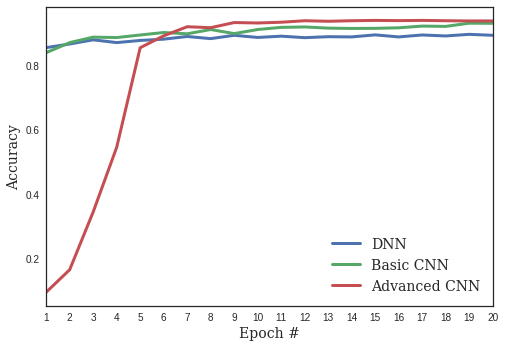

In [68]:
plt.figure()
epoch = len(train_relu_adam_001.history["loss"])
plt.plot(np.arange(1, epoch+1), train_relu_adam_001.history['val_acc'], label='DNN', lw=3)
plt.plot(np.arange(1, epoch+1), train_basic_cnn.history['val_acc'], label='Basic CNN', lw=3)
plt.plot(np.arange(1, epoch+1), train_model_cnn.history['val_acc'], label='Advanced CNN', lw=3)
plt.ylabel('Accuracy', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

In [73]:
test_result=model_cnn.evaluate(np.expand_dims(test_images, -1)  , test_labels)
print(f'Testing Accuracy of the Advanced CNN: {test_result[1]}')


10000/10000 [==============================] - 2s 237us/step
Testing Accuracy of the Advanced CNN: 0.9339


## (lab 2-f) MobileNet

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import cv2

In [28]:
height,width = 56, 56

input_image = Input(shape=(height,width))
input_image_ = Lambda(lambda x: K.repeat_elements(K.expand_dims(x,3),3,3))(input_image)

model_mobilenet_base = MobileNet(input_tensor=input_image_,
                                 weights='imagenet',
                                 include_top=False, 
                                 pooling='avg')


x = Dropout(0.5)(model_mobilenet_base.output)

predict = Dense(10, activation='softmax')(x)

model_mobilenet = Model(inputs=input_image, outputs=predict)

opfunc = tf.train.AdamOptimizer(learning_rate = 0.001)

model_mobilenet.compile(optimizer=opfunc, loss='categorical_crossentropy', metrics=['accuracy'])
model_mobilenet.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56)            0         
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 57, 57, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 28, 28, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv_dw_1 (

In [35]:
resized_train_images = np.array([cv2.resize(x, (height, width)).astype(float) for x in train_images])

train_his_mobilenet = model_mobilenet.fit(resized_train_images, train_labels,
          batch_size=256,
          epochs=20, 
          validation_split=0.05,                           
          verbose=1)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 53s 935us/step - loss: 0.4497 - acc: 0.8601 - val_loss: 0.2319 - val_acc: 0.9150
Epoch 2/20
57000/57000 [==============================] - 50s 870us/step - loss: 0.2440 - acc: 0.9178 - val_loss: 0.2238 - val_acc: 0.9230
Epoch 3/20
57000/57000 [==============================] - 50s 871us/step - loss: 0.2067 - acc: 0.9283 - val_loss: 0.2299 - val_acc: 0.9100
Epoch 4/20
57000/57000 [==============================] - 50s 871us/step - loss: 0.1845 - acc: 0.9361 - val_loss: 0.1760 - val_acc: 0.9283
Epoch 5/20
57000/57000 [==============================] - 50s 871us/step - loss: 0.1699 - acc: 0.9412 - val_loss: 0.1719 - val_acc: 0.9360
Epoch 6/20
57000/57000 [==============================] - 50s 871us/step - loss: 0.1530 - acc: 0.9476 - val_loss: 0.1759 - val_acc: 0.9323
Epoch 7/20
57000/57000 [==============================] - 50s 870us/step - loss: 0.1449 - acc: 0.9498 - val_loss: 0.2

In [40]:
resized_test_images = np.array([cv2.resize(x, (height, width)).astype(float) for x in test_images])
test_result=model_mobilenet.evaluate(resized_test_images , test_labels)
print(f'Testing Accuracy of MobileNet: {test_result[1]}')

10000/10000 [==============================] - 4s 364us/step
Testing Accuracy of MobileNet: 0.9282


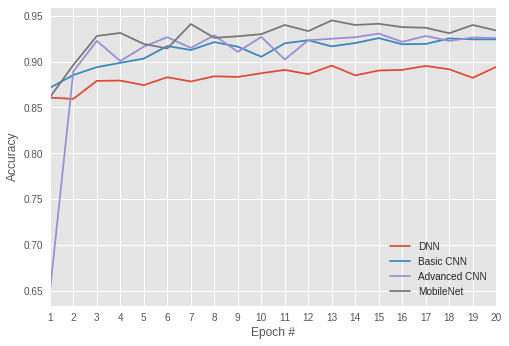

In [41]:
#plt.style.use("ggplot")
plt.figure()
epoch = len(train_his_p2.history["loss"])
plt.plot(np.arange(1, epoch+1), train_his_p2.history['val_acc'], label='DNN', lx=3)
plt.plot(np.arange(1, epoch+1), train_his_basic_cnn.history['val_acc'], label='Basic CNN', lx=3)
plt.plot(np.arange(1, epoch+1), train_his_cnn.history['val_acc'], label='Advanced CNN', lx=3)
plt.plot(np.arange(1, epoch+1), train_his_mobilenet.history['val_acc'], label='MobileNet', lx=3)

#plt.title('model accuracy')
plt.ylabel('Accuracy', family='serif', size=14)
plt.xlabel('Epoch #', family='serif', size=14)
plt.xticks(np.arange(1, epoch+1))
plt.xlim([1, epoch])
plt.legend(prop={'size':14, 'family':'serif'})
plt.show()

In [0]:
print(f'Testing Accuracy of MobileNet: {test_result[1]}')